### Importing the Libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
# from keras.preprocessing import image
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

import cv2
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from string import ascii_uppercase

### Part 1 - Data Preprocessing

#### Generating images for the Training set

In [8]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

#### Generating images for the Validation set

In [6]:
validation_datagen = ImageDataGenerator(rescale = 1./255)

#### Generating images for the Test set

In [3]:
test_datagen = ImageDataGenerator(rescale = 1./255)

### Creating the Training set

In [9]:
training_set = train_datagen.flow_from_directory('../dataSet/trainingData/',                                
                                                 target_size = (128, 128),
                                                 batch_size = 10,
                                                 color_mode = 'grayscale',                                
                                                 class_mode = 'categorical')

Found 1350 images belonging to 27 classes.


In [10]:
validation_set = validation_datagen.flow_from_directory('../dataSet/validationData/',
                                            target_size = (128, 128),                                  
                                            batch_size = 10,        
                                            color_mode = 'grayscale',
                                            class_mode = 'categorical')

Found 270 images belonging to 27 classes.


In [11]:
test_set = test_datagen.flow_from_directory('../dataSet/testingData/',
                                            target_size = (128, 128),                                  
                                            batch_size = 10,        
                                            color_mode = 'grayscale',
                                            class_mode = 'categorical')

Found 270 images belonging to 27 classes.


### Part 2 - Building the CNN

#### Initializing the CNN

In [29]:
classifier = tf.keras.models.Sequential()

#### Step 1 - Convolution

In [30]:
classifier.add(tf.keras.layers.Conv2D(filters=32,
                                     kernel_size=3, 
                                     padding="same", 
                                     activation="relu", 
                                     input_shape=[128, 128, 1]))

#### Step 2 - Pooling

In [31]:
classifier.add(tf.keras.layers.MaxPool2D(pool_size=2, 
                                         strides=2, 
                                         padding='valid'))

#### Adding a second convolutional layer

In [32]:
classifier.add(tf.keras.layers.Conv2D(filters=32, 
                                      kernel_size=3, 
                                      padding="same", 
                                      activation="relu"))

classifier.add(tf.keras.layers.MaxPool2D(pool_size=2, 
                                         strides=2, 
                                         padding='valid'))

#### Step 3 - Flattening

In [33]:
classifier.add(tf.keras.layers.Flatten())

#### Step 4 - Full Connection

In [34]:
classifier.add(tf.keras.layers.Dense(units=128, activation='relu'))
classifier.add(tf.keras.layers.Dropout(0.40))
classifier.add(tf.keras.layers.Dense(units=96, activation='relu'))
classifier.add(tf.keras.layers.Dropout(0.40))
classifier.add(tf.keras.layers.Dense(units=64, activation='relu'))
classifier.add(tf.keras.layers.Dense(units=27, activation='softmax')) # softmax for more than 2

### Part 3 - Training the CNN

#### Compiling the CNN

In [35]:
classifier.compile(optimizer = 'adam', 
                   loss = 'categorical_crossentropy', 
                   metrics = ['accuracy'])

#### Training the CNN on the Training set and evaluating it on the Test set

In [36]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 128, 128, 32)      320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [37]:
history = classifier.fit(training_set,
                  epochs = 20,
                  validation_data = test_set)

Epoch 1/20


135/135 [==============================] - 38s 259ms/step - loss: 3.3261 - accuracy: 0.0296 - val_loss: 3.2959 - val_accuracy: 0.0370
Epoch 2/20
135/135 [==============================] - 32s 238ms/step - loss: 3.2968 - accuracy: 0.0333 - val_loss: 3.2321 - val_accuracy: 0.0852
Epoch 3/20
135/135 [==============================] - 32s 237ms/step - loss: 2.7312 - accuracy: 0.2096 - val_loss: 0.9672 - val_accuracy: 0.6444
Epoch 4/20
135/135 [==============================] - 32s 236ms/step - loss: 1.5463 - accuracy: 0.5200 - val_loss: 0.5973 - val_accuracy: 0.8593
Epoch 5/20
135/135 [==============================] - 32s 240ms/step - loss: 1.1589 - accuracy: 0.6415 - val_loss: 0.2962 - val_accuracy: 0.9519
Epoch 6/20
135/135 [==============================] - 33s 243ms/step - loss: 0.8551 - accuracy: 0.7393 - val_loss: 0.2074 - val_accuracy: 0.9667
Epoch 7/20
135/135 [==============================] - 32s 238ms/step - loss: 0.7032 - accuracy: 0.7778 - val_loss: 0.2084 - val_accuracy: 0.9

Best Validation Loss: 0.1240
Best Validation Accuracy: 0.9815


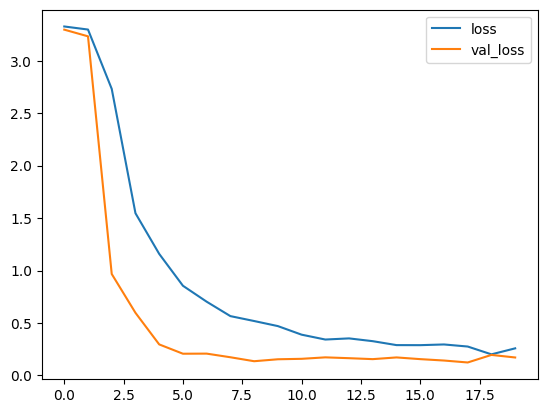

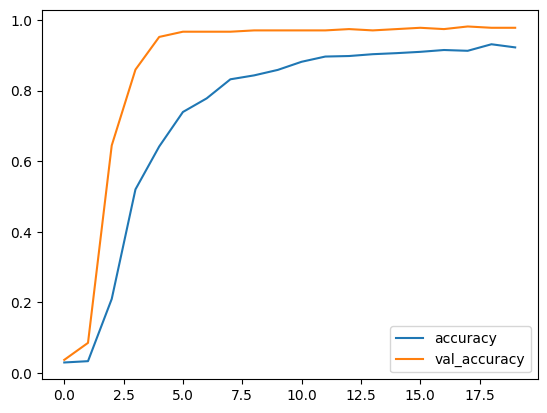

In [38]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_accuracy'].max()))

#### Saving the Model

In [39]:
model_json = classifier.to_json()
with open("model(20 epoch).json", "w") as json_file:
    json_file.write(model_json)
print('Model Saved')
classifier.save_weights('model(20 epoch).h5')
print('Weights saved')

Model Saved
Weights saved


Loading Model

In [12]:
json_file = open('model(20 epoch).json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = tf.keras.models.model_from_json(loaded_model_json)

loaded_model.load_weights("model(20 epoch).h5")
print("Loaded model from disk")

Loaded model from disk


Making predictions of test images using the Model

In [13]:
num_batches = len(test_set)  # Get the total number of batches

all_predictions = []  # To store predictions for all batches
all_true_labels = []   # To store true labels for all batches

# Loop through all batches in the test data generator
for _ in range(num_batches):
    batch_images, batch_labels = next(test_set)  # Load batch images and labels

    # Make predictions on the batch of images
    batch_predictions = loaded_model.predict(batch_images)

    all_predictions.append(batch_predictions)
    all_true_labels.append(batch_labels)

# Concatenate predictions and true labels from all batches into arrays
all_predictions = np.concatenate(all_predictions, axis=0)
all_true_labels = np.concatenate(all_true_labels, axis=0)

# Now 'all_predictions' contains predictions for all samples in your test set
# 'all_true_labels' contains the true labels for all samples in your test set

# Assuming your classes are one-hot encoded, get the predicted and actual classes
predicted_classes = np.argmax(all_predictions, axis=1)
actual_classes = np.argmax(all_true_labels, axis=1)


1/1 [==============================] - 0s 115ms/step


Printing predicted and actual class

In [15]:
alphabets = "0" + ascii_uppercase
count = 0

for i in range(len(predicted_classes)):
    if predicted_classes[i]==actual_classes[i]:
        count += 1

i = 0
print(f"Sample {i+1}: Predicted Class {alphabets[predicted_classes[i]]}, Actual Class {alphabets[actual_classes[i]]}\n...")
print(f"Accuracy: {count/len(predicted_classes)}")

Sample 1: Predicted Class 0, Actual Class 0
...
Accuracy: 0.9814814814814815


Displaying the test image with the predicted and actual class

1/1 [==============================] - 0s 81ms/step


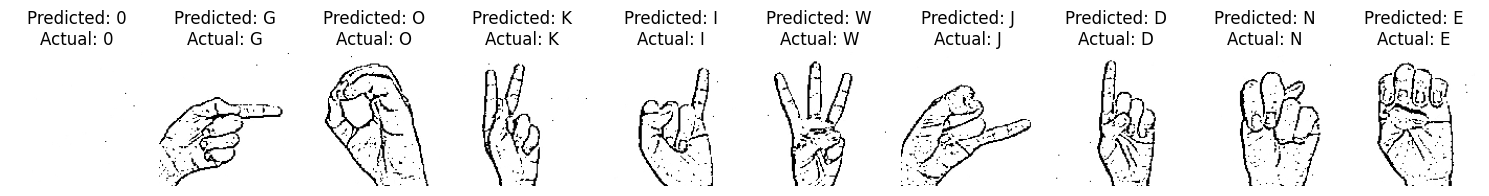

In [43]:
# Assuming test_set is your test data generator
num_batches = len(test_set)  # Get the total number of batches

# Loop through one of the batch in the test data generator
for _ in range(1):
    batch_images, batch_labels = next(test_set)  # Load batch images and labels

    # Make predictions on the batch of images
    batch_predictions = loaded_model.predict(batch_images)

    # Assuming your classes are one-hot encoded, get the predicted and actual classes
    predicted_classes = np.argmax(batch_predictions, axis=1)
    actual_classes = np.argmax(batch_labels, axis=1)

    # Create a grid of subplots
    fig, axes = plt.subplots(1, 10, figsize=(15, 5))

    # Loop through each image in the batch
    for i in range(10):
        # Display the image
        axes[i].imshow(batch_images[i].squeeze(), cmap='gray')  # Display the grayscale image
        axes[i].set_title(f"Predicted: {alphabets[predicted_classes[i]]}\nActual: {alphabets[actual_classes[i]]}")
        axes[i].axis('off')

    plt.tight_layout()  # Ensure subplots don't overlap
    plt.show()

In [46]:
alphabets = "0" + ascii_uppercase
count = 0

# Directory containing the images for prediction
image_directory = '../dataSet/Words/HELLO/'
image_files = os.listdir(image_directory)

# List to store predictions
predictions = []

# Loop through each image file in the directory
for image_file in image_files:
    img_path = os.path.join(image_directory, image_file)

    img = cv2.imread(img_path)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    test_image = cv2.resize(gray, (128, 128))

    result = loaded_model.predict(test_image.reshape(1, 128, 128, 1))

    predicted_class_index = np.argmax(result)
    predictions.append(alphabets[predicted_class_index])


1/1 [==============================] - 0s 38ms/step


In [ ]:
predictions

['H', 'E', 'L', 'L', 'O']